In [1]:
from zurich_move_data_extraction import *
from activity_count_function import *
from zurich_move_utilites import *
from gm_function import *
from zurich_move_pipeline_function import *
from extract_mask_from_video import *
from sklearn.model_selection import train_test_split

C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#PATH 

initial_path = '../CreateStudy'

# Change this value
participant_id = 'H004'

# Join the initial_path and participant_id
participant_path = os.path.join(initial_path, participant_id)
print(participant_path)

../CreateStudy\H004


In [3]:
# Get the data from csv files 
LW_data, chest_data, RW_data, GT_mask_LW, GT_mask_RW = get_data(participant_path)
# Ensure the array sizes consistency between masks and IMU data
print (len(GT_mask_LW)*2, len(LW_data))

42786 42786


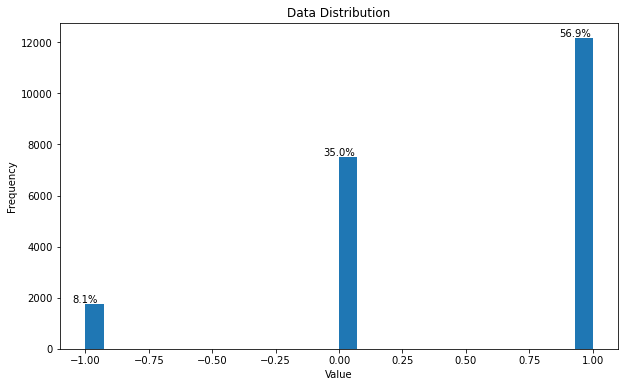

{'mean': 0.4872621885663535,
 'median': 1.0,
 'iqr': 1.0,
 'range': 2,
 'std': 0.6421221093879687,
 'max': 1,
 'min': -1,
 'num_elements': 21393}

In [4]:
get_statistics(GT_mask_LW)

In [5]:
# Create masks with WBM converted into NF movement
GT_mask_LW_wbm_into_nf = np.where(GT_mask_LW == -1, 0, GT_mask_LW)
GT_mask_RW_wbm_into_nf = np.where(GT_mask_RW == -1, 0, GT_mask_RW)

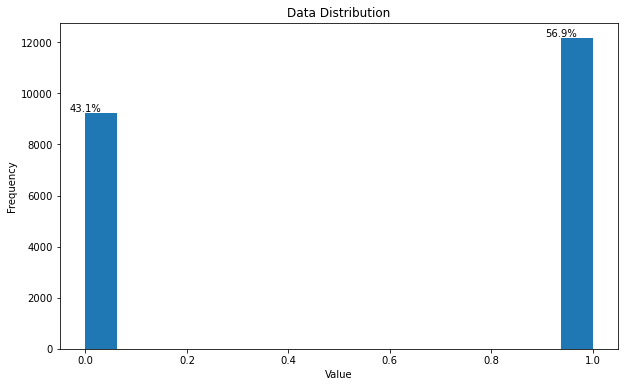

{'mean': 0.5685037161688403,
 'median': 1.0,
 'iqr': 1.0,
 'range': 1,
 'std': 0.4952850097378871,
 'max': 1,
 'min': 0,
 'num_elements': 21393}

In [6]:
get_statistics(GT_mask_LW_wbm_into_nf)

In [7]:
# Get some usefull variables
sampling_freq = 50
acc_LW = LW_data[['acc_x', 'acc_y', 'acc_z']]
acc_RW = RW_data[['acc_x', 'acc_y', 'acc_z']]
gyro_LW = LW_data[['gyro_x', 'gyro_y', 'gyro_z']]
gyro_RW = RW_data[['gyro_x', 'gyro_y', 'gyro_z']]
mag_LW = LW_data[['magneto_x', 'magneto_y', 'magneto_z']]
quat_sensor_LW = LW_data[['quat_0', 'quat_1', 'quat_2','quat_3']]
quat_sensor_RW = RW_data[['quat_0', 'quat_1', 'quat_2','quat_3']]

Downsample the mask arrays 

In [8]:
# Downsample the GT masks using linear interpolation (no complex pattern or smooth signal) 
frequency_AC = 1 # Hz 
frequency_GM = 2 # Hz
FPS_mask = 25 # Hz

GT_mask_LW_1Hz_wbm_into_nf = downsample_mask_interpolation(GT_mask_LW_wbm_into_nf, FPS_mask, frequency_AC)
GT_mask_RW_1Hz_wbm_into_nf = downsample_mask_interpolation(GT_mask_RW_wbm_into_nf, FPS_mask, frequency_AC)
GT_mask_LW_2Hz_wbm_into_nf = downsample_mask_interpolation(GT_mask_LW_wbm_into_nf, FPS_mask, frequency_GM)
GT_mask_RW_2Hz_wbm_into_nf = downsample_mask_interpolation(GT_mask_RW_wbm_into_nf, FPS_mask, frequency_GM)

GT_mask_LW_1Hz = downsample_mask_interpolation(GT_mask_LW, FPS_mask, frequency_AC)
GT_mask_RW_1Hz = downsample_mask_interpolation(GT_mask_RW, FPS_mask, frequency_AC)
GT_mask_LW_2Hz = downsample_mask_interpolation(GT_mask_LW, FPS_mask, frequency_GM)
GT_mask_RW_2Hz = downsample_mask_interpolation(GT_mask_RW, FPS_mask, frequency_GM)


GT_mask_LW_wbm_into_nf.shape, GT_mask_LW_1Hz_wbm_into_nf.shape, GT_mask_LW_2Hz_wbm_into_nf.shape

((21393, 1), (856,), (1712,))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


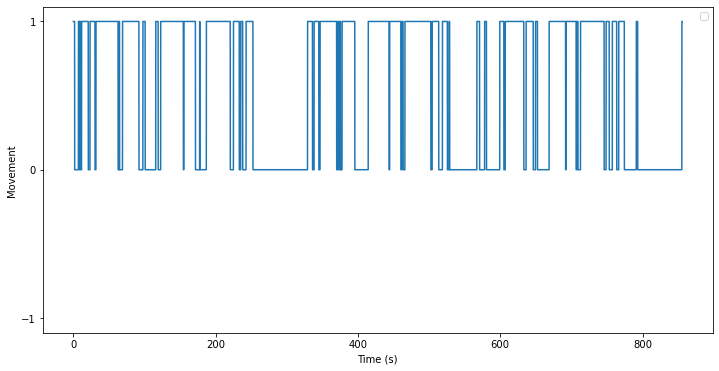

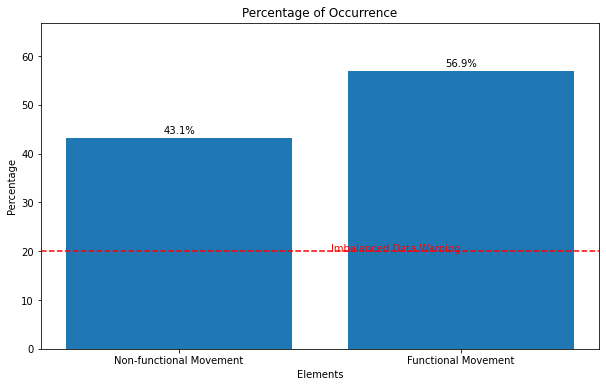

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


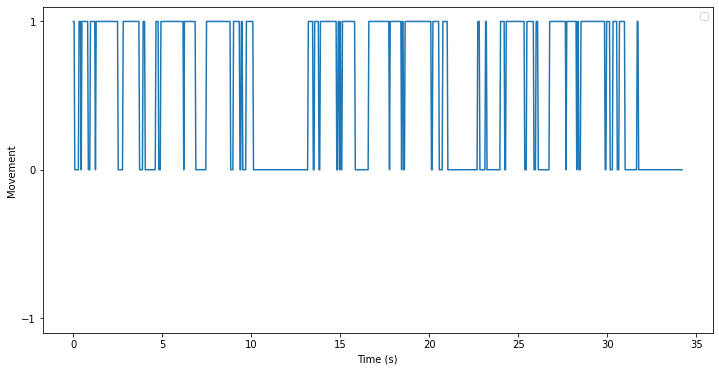

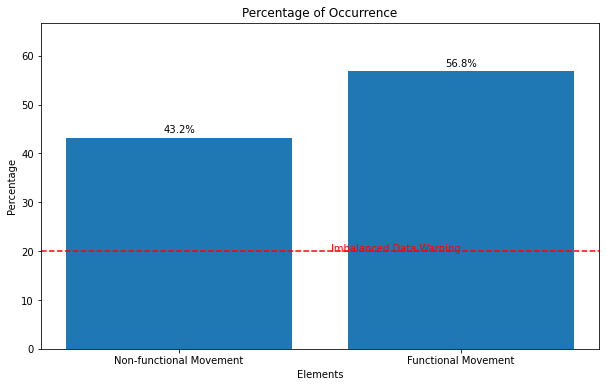

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


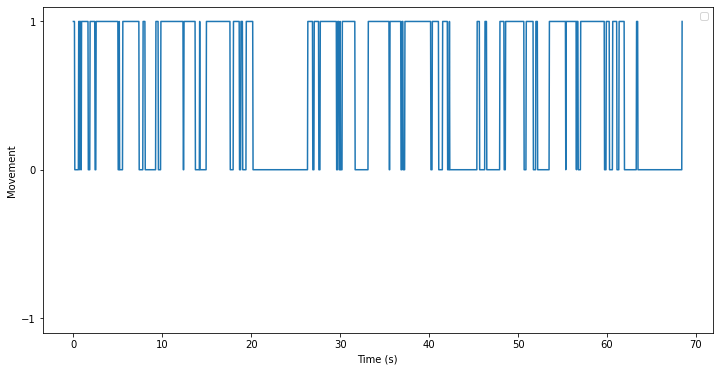

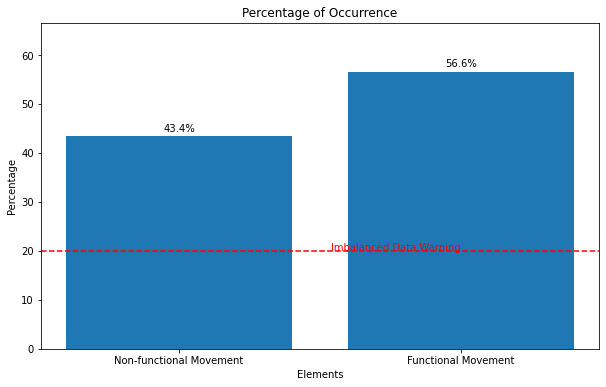

(None, None, None)

In [9]:
# Ensure the downsampling conserve the tendency 
plot_movement_tendency(GT_mask_LW_wbm_into_nf), plot_movement_tendency(GT_mask_LW_1Hz_wbm_into_nf), plot_movement_tendency(GT_mask_LW_2Hz_wbm_into_nf)

In [10]:
save_resampled_masks_as_csv(GT_mask_LW_1Hz, GT_mask_RW_1Hz, participant_path)

CSV files saved successfully.
Left-hand mask CSV saved at: ../CreateStudy\H004\GT_mask_LW_1Hz.csv
Right-hand mask CSV saved at: ../CreateStudy\H004\GT_mask_RW_1Hz.csv


Compute Activity Count

In [11]:
#Compute Actigraph Activity Count 
count_brond_LW, processed_data_LW = get_counts_brond(LW_data)
count_brond_RW, processed_data_RW = get_counts_brond(RW_data)
#count_neish_LW = get_counts_neishabouri(acc_LW)
#count_neish_RW = get_counts_neishabouri(acc_RW)

In [12]:
save_AC_as_csv(count_brond_LW, count_brond_RW, participant_path)

CSV files saved successfully.
Left-hand AC CSV saved at: ../CreateStudy\H004\count_brond_LW.csv
Right-hand AC CSV saved at: ../CreateStudy\H004\count_brond_RW.csv


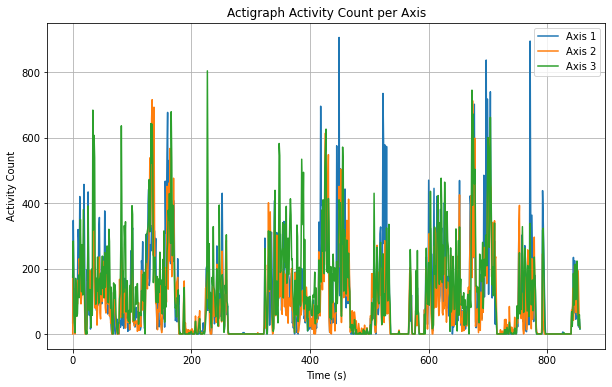

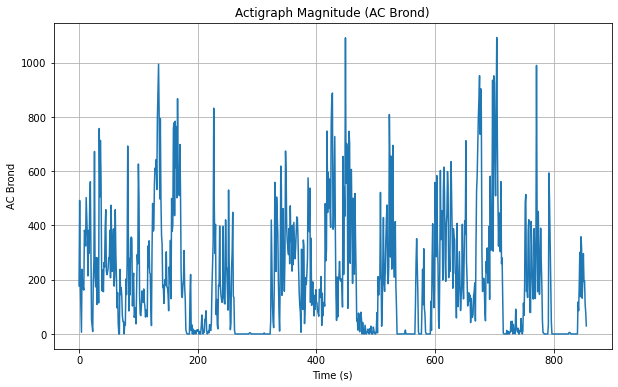

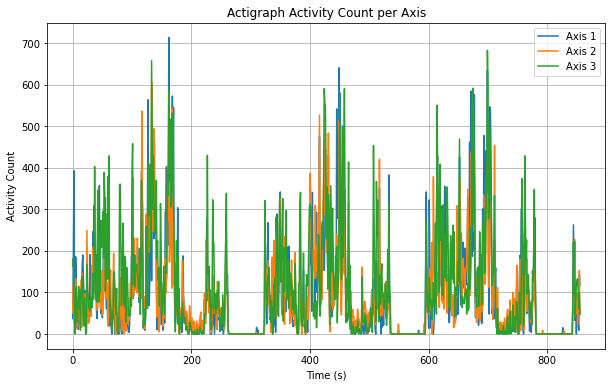

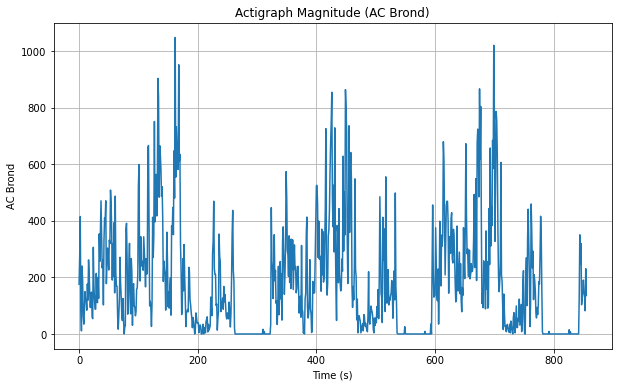

(None, None)

In [13]:
plot_actigraph_count(count_brond_LW), plot_actigraph_count(count_brond_RW)

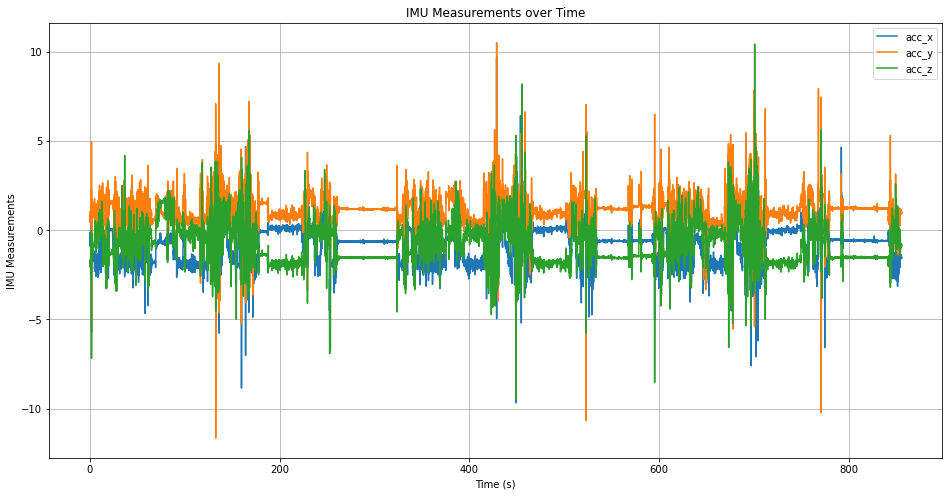

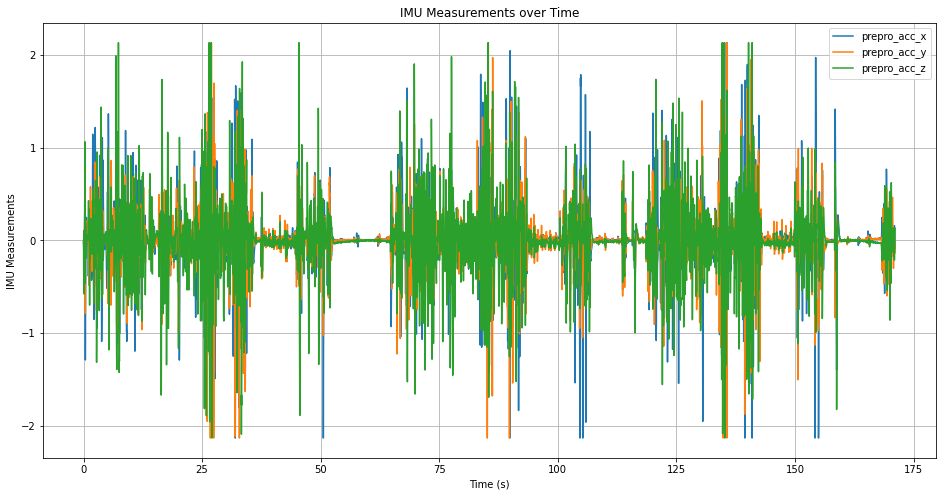

In [14]:
plot_raw_data(acc_LW, sampling_freq)
plot_raw_data(processed_data_LW, sampling_freq)

In [15]:
# Compare masks and AC 

In [16]:
GT_mask_LW_1Hz.shape, count_brond_LW['AC Brond'].shape

((856,), (856,))

In [17]:
# Create the dataset without WBM 
GT_mask_LW_1Hz_no_wbm, count_brond_LW_no_wbm = remove_wbm_data(GT_mask_LW_1Hz, count_brond_LW['AC Brond'])
GT_mask_RW_1Hz_no_wbm, count_brond_RW_no_wbm = remove_wbm_data(GT_mask_RW_1Hz, count_brond_RW['AC Brond'])

In [18]:
GT_mask_LW_1Hz_no_wbm.shape, count_brond_LW_no_wbm.shape

((787,), (787,))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


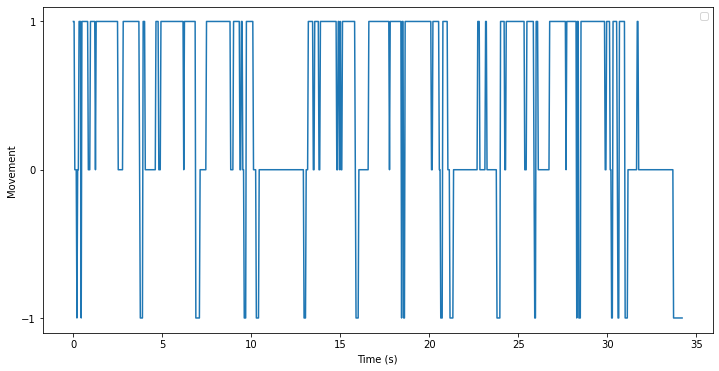

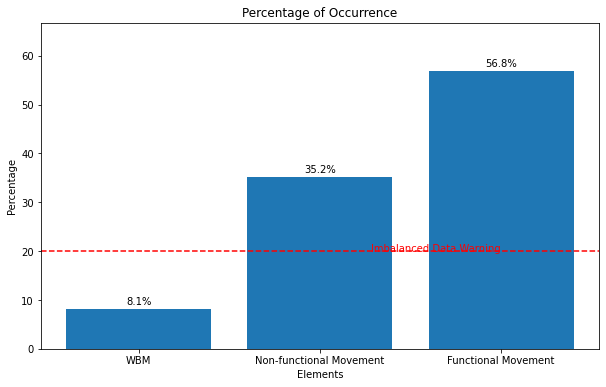

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


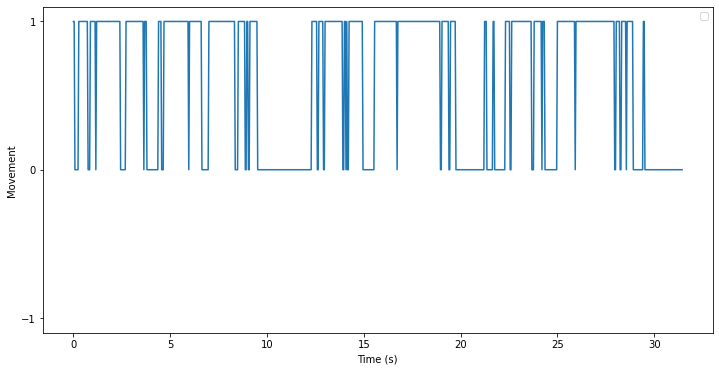

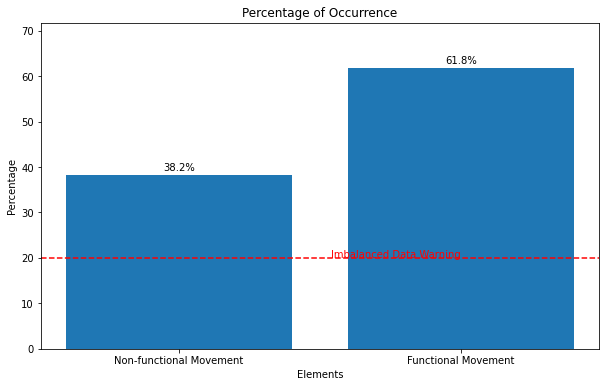

(None, None)

In [19]:
# Ensure the downsampling conserve the tendency 
plot_movement_tendency(GT_mask_LW_1Hz), plot_movement_tendency(GT_mask_LW_1Hz_no_wbm)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_boxplot_ac(ac_functional, ac_nf, ac_wbm):
    # Create a vertical box plot on the same figure with the 3 datasets represented as 3 box plots
    # y-axis is activity count

    # Set up the figure and axes
    plt.figure(figsize=(10, 6))

    # Combine the three datasets into a list to plot them on the same boxplot
    data = [ac_functional, ac_nf, ac_wbm]

    # Create three boxplots side by side using plt.boxplot()
    sns.boxplot(data=data, palette='Set3', width=0.6)

    # Set the x-axis labels
    plt.xticks(ticks=[0, 1, 2], labels=['Functional', 'Non-Functional', 'WBM'])

    # Set the y-axis label
    plt.ylabel('Activity Count')

    # Add a title
    plt.title('Boxplot of Activity Count')

    # Adjust the layout to avoid the x-axis labels being cut off
    plt.tight_layout()

    # Show the plot
    plt.show()

def plot_ac_tendency(mask_array, AC_array):
    AC_array = np.array(AC_array)
    # Create the three arrays of data using the mask
    ac_functional = AC_array[mask_array == 1]
    ac_nf = AC_array[mask_array == 0]
    ac_wbm = AC_array[mask_array == -1]

    # Call the function to plot the vertical box plot using the three arrays of data
    plot_boxplot_ac(ac_functional, ac_nf, ac_wbm)


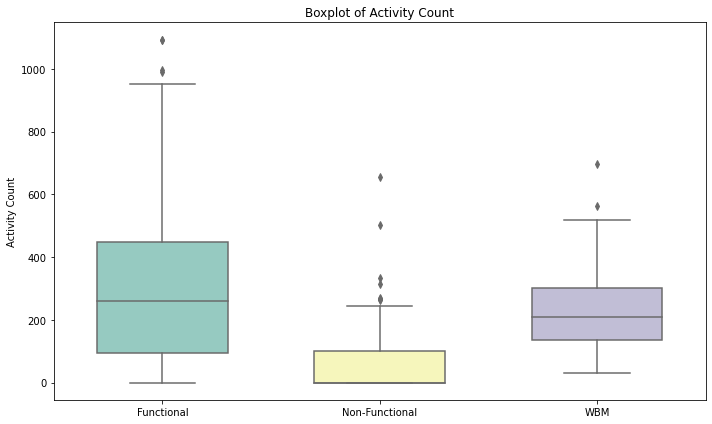

In [21]:
plot_ac_tendency(GT_mask_LW_1Hz, count_brond_LW['AC Brond'])

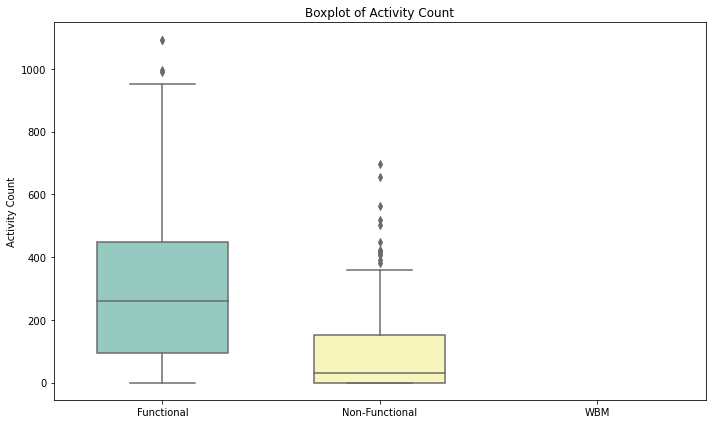

In [22]:
# Option1: WBM into NF 
plot_ac_tendency(GT_mask_LW_1Hz_wbm_into_nf, count_brond_LW['AC Brond'])

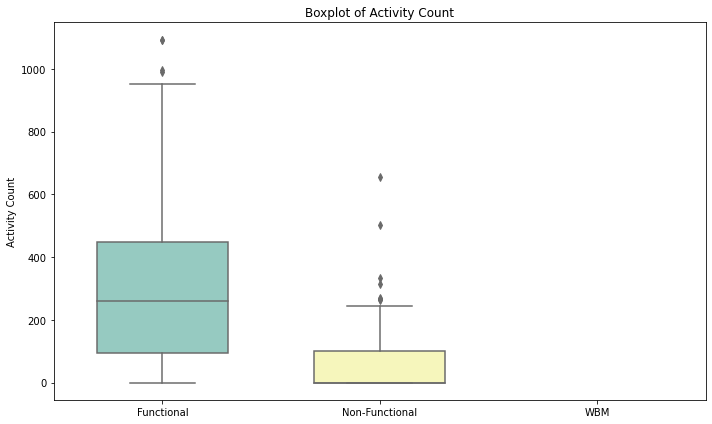

In [23]:
# Option2: WBM data removed completely 
plot_ac_tendency(GT_mask_LW_1Hz_no_wbm, count_brond_LW_no_wbm)

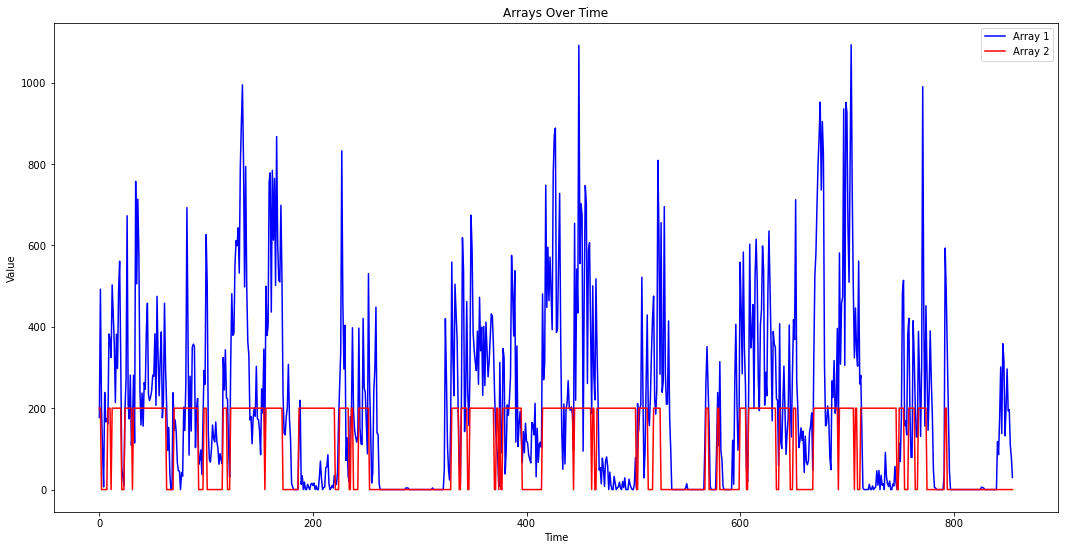

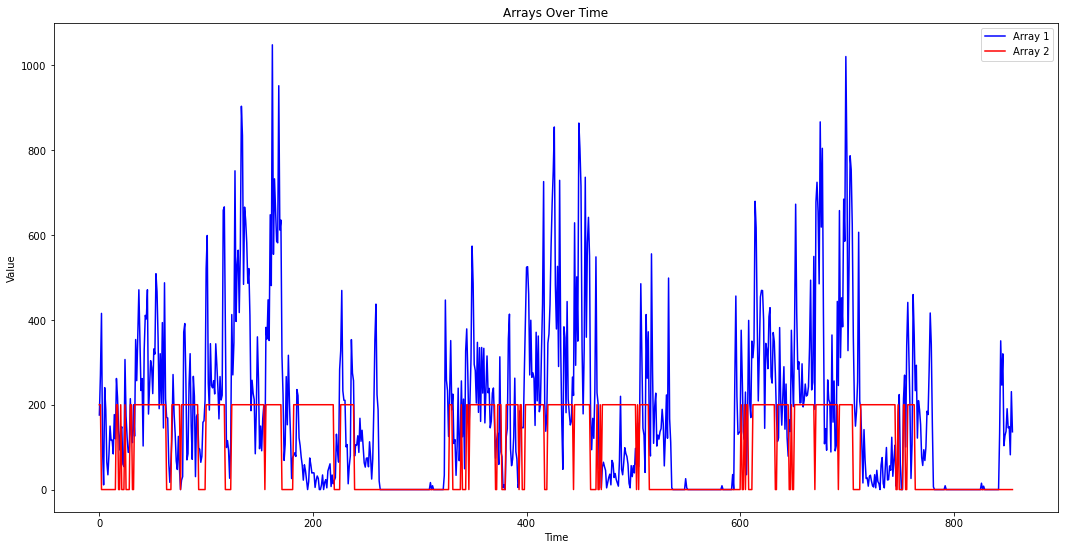

(None, None)

In [24]:
# Option1: WBM into NF 
plot_superposition(count_brond_LW['AC Brond'], 200*GT_mask_LW_1Hz_wbm_into_nf), plot_superposition(count_brond_RW['AC Brond'], 200*GT_mask_RW_1Hz_wbm_into_nf)

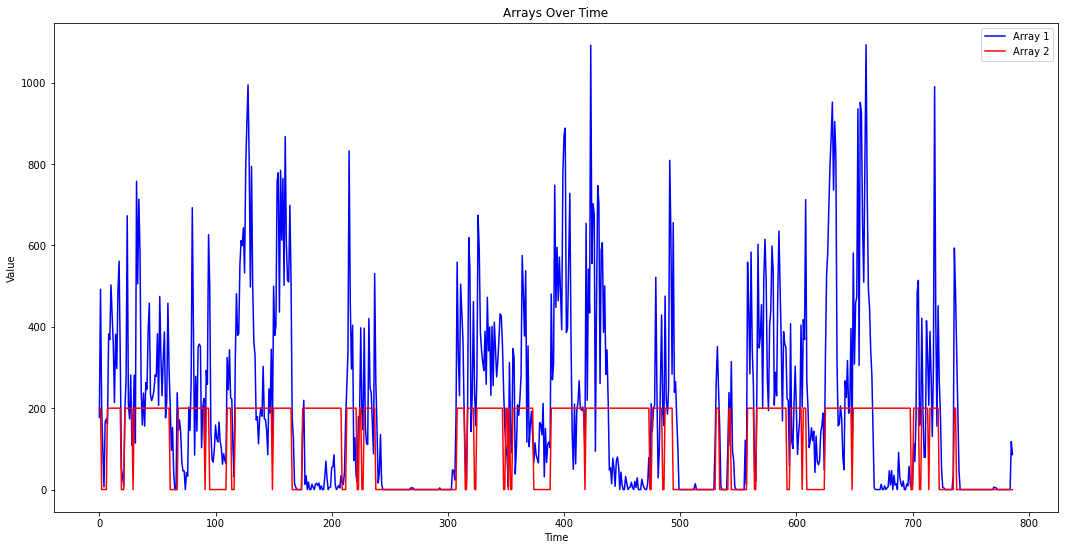

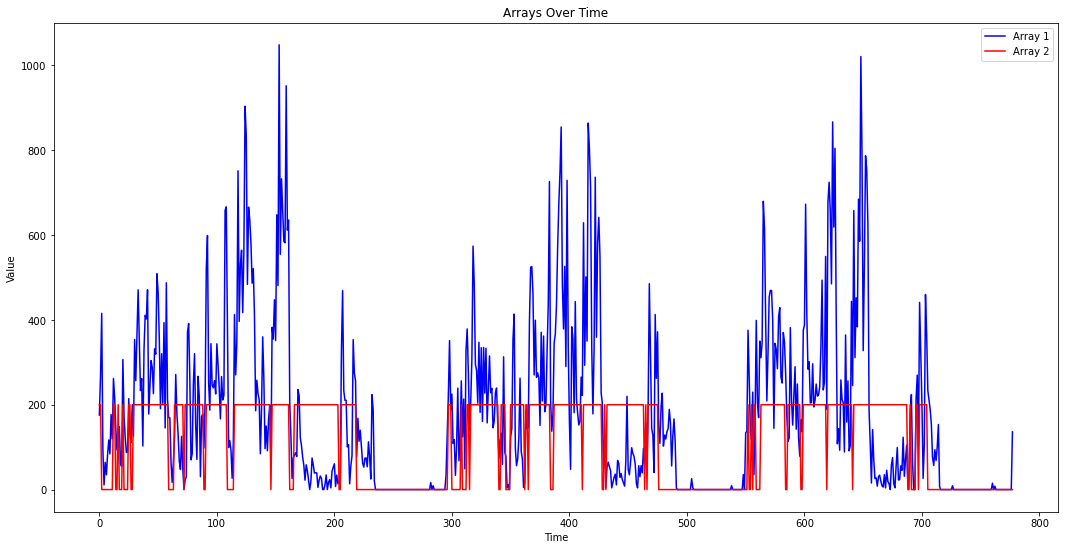

(None, None)

In [25]:
# Option2: WBM data removed
plot_superposition(count_brond_LW_no_wbm, 200*GT_mask_LW_1Hz_no_wbm), plot_superposition(count_brond_RW_no_wbm, 200*GT_mask_RW_1Hz_no_wbm)

Thresholds tested: [0.00000000e+00 1.09303106e-02 2.18606212e-02 ... 1.09299827e+03
 1.09300920e+03 1.09302013e+03]


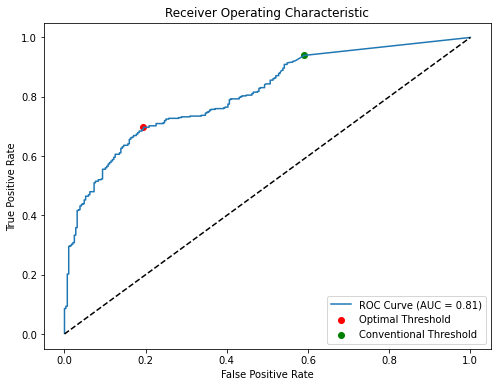

AUC: 0.81
Optimal Threshold: 170.20
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
Thresholds tested: [0.00000000e+00 1.04844169e-02 2.09688339e-02 ... 1.04841024e+03
 1.04842072e+03 1.04843121e+03]


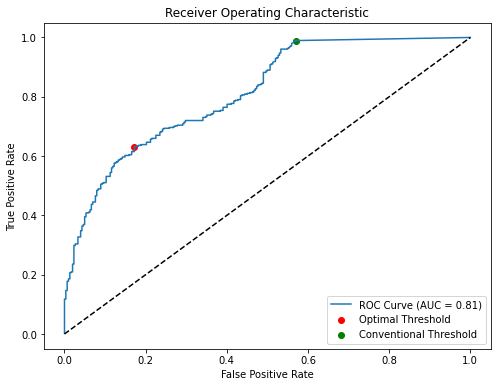

AUC: 0.81
Optimal Threshold: 177.93
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)


In [35]:
# Option1: WBM replaced by NF 

# Split the dataset: 80% to find the optimal threshold, 20% to evaluate this new treshold on unseen data 

# Splitting the data for the left wrist
X_LW = count_brond_LW['AC Brond']
y_LW = GT_mask_LW_1Hz_wbm_into_nf
X_train_LW, X_eval_LW, y_train_LW, y_eval_LW = split_dataset(X_LW, y_LW, test_size=0.2)

# Splitting the data for the right wrist
X_RW = count_brond_RW['AC Brond']
y_RW = GT_mask_RW_1Hz_wbm_into_nf
X_train_RW, X_eval_RW, y_train_RW, y_eval_RW = split_dataset(X_RW, y_RW, test_size=0.2)

# Bilateral evaluation mask
mask_bilateral_eval = get_mask_bilateral(y_eval_LW, y_eval_RW)

# Find the optimal threshold for unilateral usage of the UL 
conventional_threshold_unilateral = 2 # Bailey and Lang, 2013
conventional_threshold_bilateral = 0 # Bailey and Lang, 2013
optimal_threshold_LW = find_optimal_threshold(y_train_LW, X_train_LW, conventional_threshold_unilateral)
optimal_threshold_RW = find_optimal_threshold(y_train_RW, X_train_RW, conventional_threshold_unilateral)

In [36]:
# # Option2: WBM data removed
# # Split the dataset: 80% to find the optimal threshold, 20% to evaluate this new treshold on unseen data 

# # Splitting the data for the left wrist
# X_LW = count_brond_LW_no_wbm
# y_LW = GT_mask_LW_1Hz_no_wbm
# X_train_LW, X_eval_LW, y_train_LW, y_eval_LW = split_dataset(X_LW, y_LW, test_size=0.2)

# # Splitting the data for the right wrist
# X_RW = count_brond_RW_no_wbm
# y_RW = GT_mask_RW_1Hz_no_wbm
# X_train_RW, X_eval_RW, y_train_RW, y_eval_RW = split_dataset(X_RW, y_RW, test_size=0.2)

# # Bilateral evaluation mask
# #mask_bilateral_eval = get_mask_bilateral(y_eval_LW, y_eval_RW)

# # Find the optimal threshold for unilateral usage of the UL 
# conventional_threshold_unilateral = 2 # Bailey and Lang, 2013
# conventional_threshold_bilateral = 0 # Bailey and Lang, 2013
# optimal_threshold_LW = find_optimal_threshold(y_train_LW, X_train_LW, conventional_threshold_unilateral)
# optimal_threshold_RW = find_optimal_threshold(y_train_RW, X_train_RW, conventional_threshold_unilateral)

In [38]:
# Predictions using the optimal and conventional thresholds 

# Compute predictions using conventional threshold for unilateral usage
pred_conv_LW = get_prediction(X_eval_LW, conventional_threshold_unilateral)
pred_conv_RW = get_prediction(X_eval_RW, conventional_threshold_unilateral)

# Compute predictions using optimal threshold for unilateral usage
pred_opt_LW = get_prediction(X_eval_LW, optimal_threshold_LW)
pred_opt_RW = get_prediction(X_eval_RW, optimal_threshold_RW)
# Compute predictions using conventional threshold for bilateral usage
pred_conv_bilateral = get_prediction_bilateral(X_eval_LW, conventional_threshold_unilateral, X_eval_RW, conventional_threshold_unilateral)

# Compute predictions using optimal threshold for bilateral usage
pred_opt_bilateral = get_prediction_bilateral(X_eval_LW, optimal_threshold_LW, X_eval_RW, optimal_threshold_RW)

# Compute predictions using optimal threshold for bilateral usage
pred_opt_bilateral = get_prediction_bilateral(X_eval_LW, optimal_threshold_LW, X_eval_RW, optimal_threshold_RW)

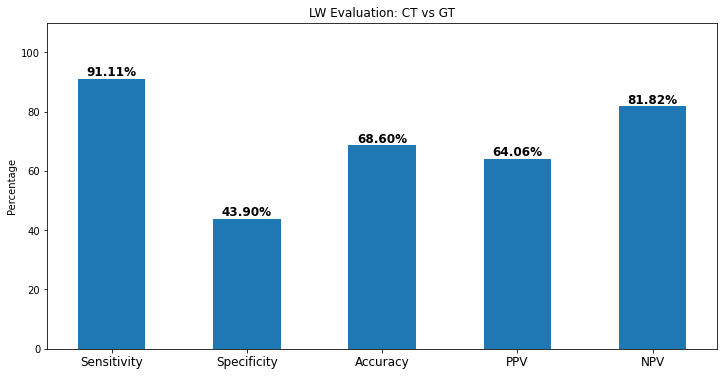

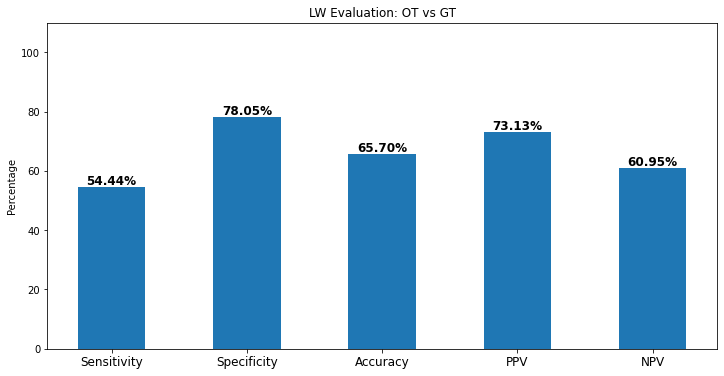

In [41]:
# Evaluation of the optimal threshold using the unseen data
metrics_LW_CT = get_evaluation_metrics(y_eval_LW, pred_conv_LW, 'LW Evaluation: CT vs GT')
metrics_LW_OT = get_evaluation_metrics(y_eval_LW, pred_opt_LW, 'LW Evaluation: OT vs GT')

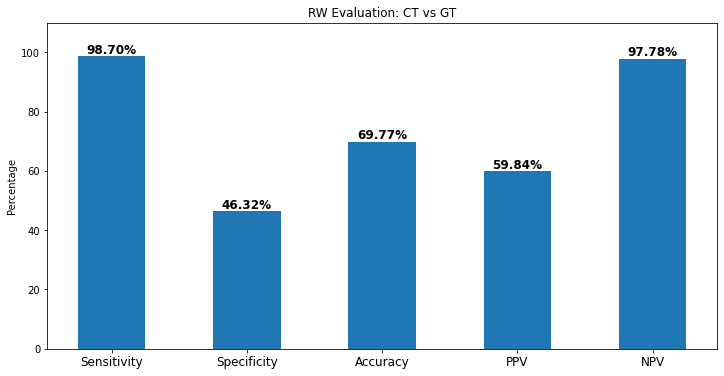

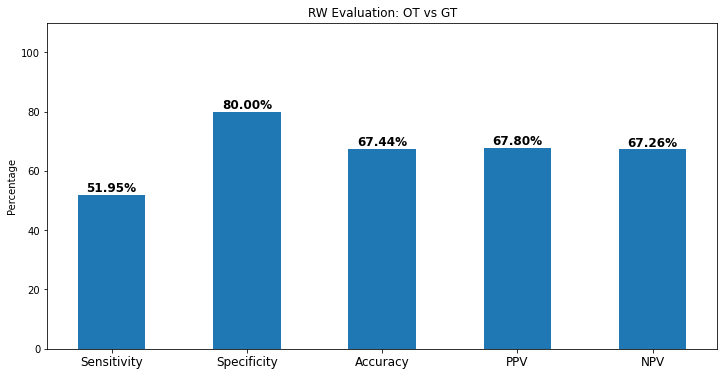

In [42]:
metrics_RW_CT = get_evaluation_metrics(y_eval_RW, pred_conv_RW, 'RW Evaluation: CT vs GT')
metrics_RW_OT = get_evaluation_metrics(y_eval_RW, pred_opt_RW, 'RW Evaluation: OT vs GT')

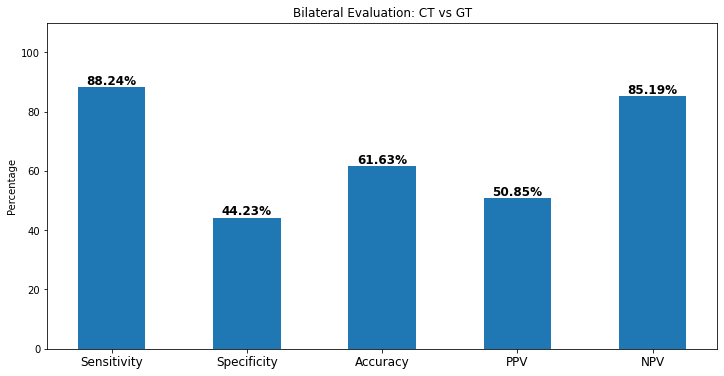

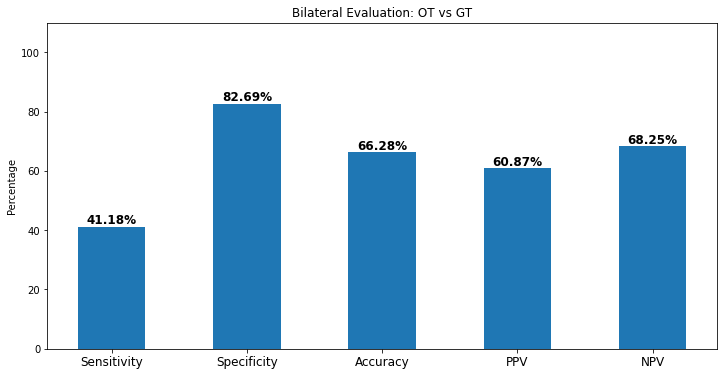

In [43]:
metrics_bilateral_CT = get_evaluation_metrics(mask_bilateral_eval, pred_conv_bilateral, 'Bilateral Evaluation: CT vs GT')
metrics_bilateral_OT = get_evaluation_metrics(mask_bilateral_eval, pred_opt_bilateral, 'Bilateral Evaluation: OT vs GT')

In [46]:
# Create a structure to save all the metrics 
metrics_dictionary = create_metrics_dictionary(metrics_LW_CT, metrics_RW_CT, metrics_bilateral_CT, metrics_LW_OT, metrics_RW_OT, metrics_bilateral_OT)

In [47]:
# Save metrics as csv file: evaluation metrics on unseen data 
save_metrics_dictionary_as_csv(metrics_dictionary, participant_path)

The metrics dictionary has been saved as ../CreateStudy\H004\evaluation_metrics.csv.


In [58]:
# Save optimal AC threhshold for this participant 
save_optimal_threshold(participant_path, optimal_threshold_LW, optimal_threshold_RW)

Thresholds saved successfully at: ../CreateStudy\H004\optimal_threshold.csv


In [48]:
## Laterality metrics

In [49]:
# Bilateral Magnitude 
bilateral_magnitude = compute_bilateral_magnitude(count_brond_LW['AC Brond'], count_brond_RW['AC Brond'])

In [50]:
magnitude_ratio = get_magnitude_ratio(count_brond_LW['AC Brond'], count_brond_RW['AC Brond'])

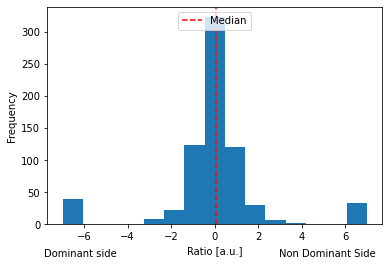

In [51]:
plot_distribution_ratio(magnitude_ratio)

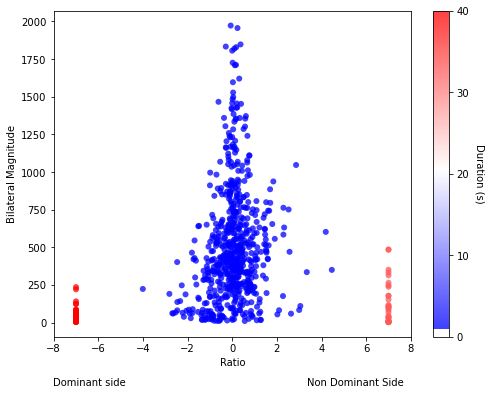

In [52]:
plot_density(bilateral_magnitude, magnitude_ratio)

In [ ]:
## GM 

In [ ]:
roll_mad, pitch_mad, yaw_mad = compute_euler_angles(acc_LW, gyro_LW, sampling_freq)

In [ ]:
plot_angles_over_time(pitch_mad), plot_angles_over_time(yaw_mad)

In [ ]:
gm_LW = gm_algorithm(pitch_mad, yaw_mad, functional_space = 30)

In [ ]:
plot_gm_scores(gm_LW)

Compare GT and GM 

In [ ]:
get_statistics(GT_mask_LW_2Hz)

In [ ]:
# Conventional FS 30deg 
# Trim data to remove wbm data
if replace_wbm: 
    GT_mask_LW_2Hz_no_wbm, gm_LW_no_wbm = remove_wbm_data(GT_mask_LW_2Hz, gm_LW)

In [ ]:
plot_superposition(gm_LW_no_wbm, GT_mask_LW_2Hz_no_wbm)

In [ ]:
# Looking for an optimal FS for the GM algorithm

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, jaccard_score, recall_score, confusion_matrix
from sklearn.metrics import cohen_kappa_score

def align_datasets(dataset1, dataset2):
    size1 = len(dataset1)
    size2 = len(dataset2)
    
    if size1 > size2:
        dataset1 = dataset1[:size2]
    elif size2 > size1:
        dataset2 = dataset2[:size1]
    
    return dataset1, dataset2

def split_dataset_gm(pitch, yaw, ground_truth, test_size=0.2, random_state=42):
    # Upsample ground_truth to match the 50Hz sampling freq of the angles 
    ground_truth = upsample_data(ground_truth, 25, 50)
    
    # Ensure dataset have the same length, otherwise trim the longer one
    ground_truth, pitch = align_datasets(ground_truth, pitch)
    ground_truth, yaw = align_datasets(ground_truth, yaw)
    
    # Split pitch angles (X1), yaw angles (X2), and ground truth (Y) between training and testing using 80/20 split
    X1_train, X1_test, X2_train, X2_test, Y_train, Y_test = train_test_split(pitch, yaw, ground_truth, test_size=test_size, random_state=random_state)
    
    return Y_train, X1_train, X2_train, Y_test, X1_test, X2_test

def compute_similarity_metric(ground_truth, gm_scores, metric):
    if metric == 'accuracy':
        return accuracy_score(ground_truth, gm_scores)
    elif metric == 'precision':
        return precision_score(ground_truth, gm_scores, zero_division=1.0) # Same as PPV
    elif metric == 'f1':
        return f1_score(ground_truth, gm_scores)
    elif metric == 'jaccard':
        return jaccard_score(ground_truth, gm_scores)
    elif metric == 'sensitivity':
        return recall_score(ground_truth, gm_scores)  # Same as recall
    elif metric == 'specificity':
        tn, fp, fn, tp = confusion_matrix(ground_truth, gm_scores).ravel()  # Same as TNR
        return tn / (tn + fp)
    elif metric == 'npv':
        tn, fp, fn, tp = confusion_matrix(ground_truth, gm_scores).ravel()
        return tn / (tn + fn)
    elif metric == 'cohen-kappa':
        return cohen_kappa_score(ground_truth, gm_scores)
    else:
        raise ValueError("Invalid similarity metric: " + metric)

    
def find_optimal_functional_space_gm(training_ground_truth, training_pitch, training_yaw, similarity_metrics, replace_wbm):
    # Using training data only 
    functional_space_array = list(range(5, 91, 5))
    print("Functional Spaces:", functional_space_array)
    
    optimal_functional_spaces = {}
    optimal_functional_space_frequencies = {}
    
    for similarity_metric in similarity_metrics:
        print("Metric:", similarity_metric)
        
        best_similarity_score = -1
        optimal_functional_space = None
    
        for functional_space in functional_space_array:
        
            # Compute gm scores @ 2Hz using training pitch, yaw, and the given functional space
            gm_scores = gm_algorithm(training_pitch, training_yaw, functional_space=functional_space)
            
            # Trim the data to remove the WBM epochs ie labels with -1 value
            if replace_wbm: 
                training_ground_truth_no_wbm, gm_scores_no_wbm = remove_wbm_data(training_ground_truth, gm_scores)

            else: 
                training_ground_truth_no_wbm = training_ground_truth
                gm_scores_no_wbm = gm_scores
            
            # Compute a similarity score between gm scores at this given functional space and the training ground truth dataset
            similarity_score = compute_similarity_metric(training_ground_truth_no_wbm, gm_scores_no_wbm, similarity_metric)
        
            # Update the similarity score and the new 'best' functional space if needed
            if similarity_score > best_similarity_score:
                best_similarity_score = similarity_score
                optimal_functional_space = functional_space
    
        # Store the optimal functional space and its corresponding similarity metric score
        optimal_functional_spaces[similarity_metric] = (optimal_functional_space, best_similarity_score)
        
        # Count the frequency of each optimal functional space value
        if optimal_functional_space in optimal_functional_space_frequencies:
            optimal_functional_space_frequencies[optimal_functional_space] += 1
        else:
            optimal_functional_space_frequencies[optimal_functional_space] = 1
    
    # Find the most frequent optimal functional space value
    most_frequent_optimal_space = max(optimal_functional_space_frequencies, key=optimal_functional_space_frequencies.get)
    
    # Print the most frequent optimal functional space value
    print("Most Frequent Optimal Functional Space:", most_frequent_optimal_space)
    
    # Return the dictionary containing the optimal functional spaces for each similarity metric
    # and the most frequent optimal functional space value
    return optimal_functional_spaces, most_frequent_optimal_space

In [ ]:
# Split the data
Y_train, X1_train, X2_train, Y_test, X1_test, X2_test = split_dataset_gm(pitch_mad, yaw_mad, GT_mask_LW, test_size=0.2)
# Downsample the GT to 2Hz to match gm scores 
Y_train = downsample_mask_interpolation(Y_train, 50, 2)
Y_test = downsample_mask_interpolation(Y_test, 50, 2)

In [ ]:
similarity_metrics = ['accuracy', 'precision', 'f1', 'jaccard', 'sensitivity', 'specificity', 'npv', 'cohen-kappa']

In [ ]:
# Find optimal functional space
optimal_functional_spaces, most_frequent_optimal_space = find_optimal_functional_space_gm(Y_train, X1_train, X2_train, similarity_metrics, replace_wbm=False)

In [ ]:
print(optimal_functional_spaces)

In [ ]:
import matplotlib.pyplot as plt

def visualize_metrics(metrics_dict):
    metric_names = list(metrics_dict.keys())
    values = [metric[1] * 100 for metric in metrics_dict.values()]
    optimal_functional_values = [metric[0] for metric in metrics_dict.values()]

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(metric_names, values, color='skyblue')
    ax.set_xlabel('Metric')
    ax.set_ylabel('Value (%)')

    ax.set_ylim(0, max(values) + 5)  # Set the y-axis limit to accommodate labels on top of bars

    for i, v in enumerate(values):
        ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', color='black')

    ax2 = ax.twinx()
    ax2.plot(metric_names, optimal_functional_values, color='orange', marker='o')
    ax2.set_ylabel('Functional Space Value')
    ax2.set_ylim(min(optimal_functional_values) - 5, max(optimal_functional_values) + 5)

    plt.title('Optimal Functional Value and Metric Values')
    plt.show()


In [ ]:
visualize_metrics(optimal_functional_spaces)

In [ ]:
def test_optimal_functional_space_gm(optimal_functional_space, testing_ground_truth, testing_pitch, testing_yaw, sampling_freq, similarity_metrics):
    # Using testing data only
    
    # Compute gm scores using the new optimal_functional_space
    gm_scores = gm_algorithm(testing_pitch, testing_yaw, functional_space=optimal_functional_space)
    
    # Trim the data to remove the WBM epochs ie labels with -1 value
    testing_ground_truth_no_wbm, gm_scores_no_wbm = remove_wbm_data(testing_ground_truth, gm_scores)
    
    similarity_scores = {}
    
    # Loop for each metric
    for similarity_metric in similarity_metrics:
        # Use similarity metric to compare gm scores and testing_ground_truth dataset
        similarity_score = compute_similarity_metric(testing_ground_truth_no_wbm, gm_scores_no_wbm, similarity_metric)
        similarity_scores[similarity_metric] = similarity_score
    
    # Return the evaluation scores as a dictionary of similarity metrics
    return similarity_scores


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

def compute_tpr_fpr(predictions, ground_truth):
    tn, fp, fn, tp = confusion_matrix(ground_truth, predictions).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

def plot_roc_curve(tpr, fpr, thresholds):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()
    
def find_optimal_threshold(tpr, fpr, thresholds):
    youden_index = tpr - fpr
    optimal_index = np.argmax(youden_index)
    optimal_threshold = thresholds[optimal_index]
    return optimal_threshold

def find_optimal_functional_space_roc(training_ground_truth, training_pitch, training_yaw):
    # Define the functional_spaces, i.e., the parameter we want to optimize
    functional_space_array = list(range(5, 91, 5))
    
    # Define TPR and FPR arrays to store each value for each functional_space tested
    tpr_array = np.zeros(len(functional_space_array))
    fpr_array = np.zeros(len(functional_space_array))
    
    # Loop over all the functional_spaces
    for i, functional_space in enumerate(functional_space_array):
        # For each functional_space, compute gm scores with this functional space
        gm_scores = gm_algorithm(training_pitch, training_yaw, functional_space=functional_space)
        
        # Trim the data to remove the WBM epochs ie labels with -1 value
        training_ground_truth_no_wbm, gm_scores_no_wbm = remove_wbm_data(training_ground_truth, gm_scores)
    
        # Compute TPR and FPR for this specific functional space by comparing gm scores and the ground truth
        tpr_array[i], fpr_array[i] = compute_tpr_fpr(gm_scores, training_ground_truth)
    
    # Plot the ROC 
    plot_roc_curve(tpr_array, fpr_array, functional_space_array)
    
    # We can find the optimal functional space by finding the maximal Youden Index
    optimal_functional_space = find_optimal_threshold(tpr_array, fpr_array, functional_space_array)
    
    # Return the optimal functional space
    return optimal_functional_space

In [ ]:
optimal_functional_space_roc = find_optimal_functional_space_roc(Y_train, X1_train, X2_train)

In [ ]:
# Evaluate optimal functional space 
similarity_scores = test_optimal_functional_space_gm(most_frequent_optimal_space, Y_test, X1_test, X2_test, sampling_freq, similarity_metrics)
print(similarity_scores)

In [ ]:
# Evaluate optimal functional space using ROC metric
similarity_scores_roc = test_optimal_functional_space_gm(optimal_functional_space_roc, Y_test, X1_test, X2_test, sampling_freq, similarity_metrics)
print(similarity_scores_roc)

In [ ]:
import matplotlib.pyplot as plt

def print_similarity_metrics(similarity_metrics):
    # Convert values to percentage
    similarity_metrics = {metric: value * 100 for metric, value in similarity_metrics.items()}
    
    # Create a larger figure
    plt.figure(figsize=(10, 6))
    
    # Create bar plot
    plt.bar(range(len(similarity_metrics)), list(similarity_metrics.values()), align='center')
    
    # Add value labels on top of each bar
    for i, (metric, value) in enumerate(similarity_metrics.items()):
        plt.text(i, value + 1, f'{value:.2f}%', ha='center')
    
    # Customize plot
    plt.xticks(range(len(similarity_metrics)), list(similarity_metrics.keys()))
    plt.ylim([0, 110])  # Extend the y-axis to have room for annotations
    plt.ylabel('Percentage')
    plt.title('Similarity Metrics')
    
    # Display plot
    plt.show()


In [ ]:
print_similarity_metrics(similarity_scores)

In [ ]:
print_similarity_metrics(similarity_scores_roc)

In [ ]:
# TODO when FS and AC are good enough

In [ ]:
# GMAC

In [ ]:
def window_data_gmac(data, sampling_frequency, window_size, overlap=0):
    """
    Window the input data into epochs of a specified size with optional overlap.
    
    Parameters:
        data (ndarray): Input data as a numpy array with shape (n_samples,).
        sampling_frequency (float): Sampling frequency of the data.
        window_size (float): Size of the window in seconds.
        overlap (float, optional): Proportion of overlap between windows (between 0 and 1).
    
    Returns:
        ndarray: Windowed data as a numpy array with shape (n_epochs, window_size * sampling_frequency).
    """
    
    # Calculate the number of samples per window
    window_samples = int(window_size * sampling_frequency)
    
    # Calculate the number of overlapping samples
    overlap_samples = int(window_samples * overlap)
    
    # Calculate the total number of epochs
    n_epochs = (data.shape[0] - window_samples) // (window_samples - overlap_samples) + 1
    
    # Truncate the input data to ensure an even number of epochs
    data = data[:n_epochs * (window_samples - overlap_samples) + window_samples]
    
    # Reshape the data into epochs with overlap
    windowed_data = np.lib.stride_tricks.as_strided(
        data,
        shape=(n_epochs, window_samples),
        strides=((window_samples - overlap_samples) * data.itemsize, data.itemsize)
    )
    
    return windowed_data


def compute_GMAC(activity_count, pitch_angles, functional_space=30):
    num_epoch = len(activity_count)
    
    # Get the mean value of the pitch angles over 1-second epochs
    pitch_angles_per_epoch = window_data_gmac(pitch_angles, sampling_frequency=50, window_size=1)
    
    # Compute the mean for each epoch of 1-second of data
    pitch_mean_per_epoch = np.mean(pitch_angles_per_epoch, axis=1)
    
    # Adjust the number of epochs to match the activity counts
    if len(pitch_mean_per_epoch) > num_epoch:
        pitch_mean_per_epoch = pitch_mean_per_epoch[:num_epoch]
    elif len(pitch_mean_per_epoch) < num_epoch:
        pitch_mean_per_epoch = np.pad(pitch_mean_per_epoch, (0, num_epoch - len(pitch_mean_per_epoch)), 'constant')
    
    # Initialize an array to store GMAC scores 
    GMAC_scores = np.zeros(num_epoch)
    
    print("Length of pitch_mean_per_epoch:", len(pitch_mean_per_epoch))
    print("Length of activity_count:", len(activity_count))

    for i in range(num_epoch):
        print(f"Epoch {i + 1}:")
        print("Pitch Mean:", pitch_mean_per_epoch[i])
        print("Activity Count:", activity_count[i])

        if np.abs(pitch_mean_per_epoch[i]) < functional_space and activity_count[i] > 0:
            GMAC_scores[i] = 1

In [ ]:
def optimize_functional_space_gmac(training_ground_truth, training_activity_count, training_pitch_angles, similarity_metrics):
    # Using training data only 
    functional_space_array = list(range(0, 91, 5))
    print("Functional Spaces:", functional_space_array)
    
    optimal_functional_spaces = {}
    optimal_functional_space_frequencies = {}
    
    for similarity_metric in similarity_metrics:
        print("Metric:", similarity_metric)
        
        best_similarity_score = -1
        optimal_functional_space = None
    
        for functional_space in functional_space_array:
        
            # Compute GMAC scores @ 1Hz using training pitch and training AC, and the given functional space
            gmac_score = compute_GMAC(training_activity_count, training_pitch_angles, functional_space=functional_space)
    
            # Compute a similarity score between gm scores at this given functional space and the training ground truth dataset
            similarity_score = compute_similarity_metric(training_ground_truth, gmac_score, similarity_metric)
        
            # Update the similarity score and the new 'best' functional space if needed
            if similarity_score > best_similarity_score:
                best_similarity_score = similarity_score
                optimal_functional_space = functional_space
    
        # Store the optimal functional space and its corresponding similarity metric score
        optimal_functional_spaces[similarity_metric] = (optimal_functional_space, best_similarity_score)
        
        # Count the frequency of each optimal functional space value
        if optimal_functional_space in optimal_functional_space_frequencies:
            optimal_functional_space_frequencies[optimal_functional_space] += 1
        else:
            optimal_functional_space_frequencies[optimal_functional_space] = 1
    
    # Find the most frequent optimal functional space value
    most_frequent_optimal_space = max(optimal_functional_space_frequencies, key=optimal_functional_space_frequencies.get)
    
    # Print the most frequent optimal functional space value
    print("Most Frequent Optimal Functional Space:", most_frequent_optimal_space)
    
    # Return the dictionary containing the optimal functional spaces for each similarity metric
    # and the most frequent optimal functional space value
    return optimal_functional_spaces, most_frequent_optimal_space

In [ ]:
optimize_functional_space_gmac(y_train_LW, X_train_LW, X1_train, similarity_metrics)